#Maverick Capstone EDA
##Heber Jenson
### 9/26/2023

## Table of Contents:

* Introduction
* Importing Packages and File setup
* Data Description
* Intial Data Exploration
* Missing Data Description
* Missing Maverik Data Values
* Feature Exploration (Visuals Included)
* Macro Features
* Holidays
* Merge Macro & Maverik Data
* Create Dummy Variables
* Results

## Introduction:

Maverik, a multistate gas station and convent store chain, provided us with historical data regarding sales for recently opened stores throughout the US. The data consisted of both time series data and information about each location. Maverik's hope is to have us create a model that can estimate future sales for new stores based on a variety of variables they provided. This model could then be used by Maverik to better project new stores initail revenue, and quickly identify if the store is not performing as well as it should.

This notebook walks through the initial process of exploring the data Maverik provided and preparing the data for future modeling. The notebook explores missing data, and variable distributions and explains why variables have been removed or changed. In addition to the provided data from Maverik, we added additional data, that may be useful for estimation. This data included historical prices for oil, gallons of fuel, as well as temperature data for states where Maverik has current stores. The notebook concludes with a final data set that can be used for future model development.

In [ ]:
# Import packages
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib
import seaborn as sns
from datetime import datetime
import calendar

In [ ]:
# mount colab to drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Set seed
np.random.seed(1234)

In [ ]:
# Upload data into DF from csv file.
q_data = pd.read_csv("/content/drive/MyDrive/Master's Program/Capstone/qualitative_data_msba.csv")
time_data = pd.read_csv("/content/drive/MyDrive/Master's Program/Capstone/time_series_data_msba.csv")
oil = pd.read_csv("/content/drive/MyDrive/Master's Program/Capstone/Oil_Prices.csv")
temp_data = pd.read_csv("/content/drive/MyDrive/Master's Program/Capstone/Temp_Data.csv")

## Data Description:

The data that was provided to us was comprised of two different data sets. The first data set contained time series data for 38 different Maverik locations. This data showed historical daily information for each store, including internal sales, food sales, total gallons sold diesel, and total gallons sold regular. For our model development, these will be the target variables our model will need to predict. The other variables in the time series data are used to identify the store and the date the information was obtained. The other data set Maverik provided contained a total of 54 variables, comprized of both qauntitative and qaulitative variables about each store. Variables include categorical variables such as if the store offered pizza or lottery tickets as well as quantitative variables including the store's square feet.

## Inital Data Exploration

In [ ]:
q_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 55 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Unnamed: 0                               37 non-null     int64 
 1   open_year                                37 non-null     int64 
 2   square_feet                              37 non-null     int64 
 3   front_door_count                         37 non-null     int64 
 4   years_since_last_project                 37 non-null     int64 
 5   parking_spaces                           37 non-null     int64 
 6   lottery                                  37 non-null     object
 7   freal                                    37 non-null     object
 8   bonfire_grill                            37 non-null     object
 9   pizza                                    37 non-null     object
 10  cinnabon                                 37 non-null     object


In [ ]:
q_data.head()

,Unnamed: 0,open_year,square_feet,front_door_count,years_since_last_project,parking_spaces,lottery,freal,bonfire_grill,pizza,...,rv_lanes_fueling_positions_2,hi_flow_rv_lanes_layout,hi_flow_rv_lanes_stack_type,non_24_hour,self_check_out,mens_toilet_count,mens_urinal_count,womens_toilet_count,womens_sink_count,site_id_msba
0,1,2021,5046,2,2,38,Yes,Yes,Yes,No,...,6,Stack,HF/RV,No,Yes,2,2,6,2,21560
1,2,2021,5046,2,2,39,No,Yes,Yes,Yes,...,4,Combo,HF/RV,No,Yes,5,5,10,4,21980
2,3,2021,5046,2,2,35,Yes,Yes,Yes,Yes,...,5,In-Line,None,No,Yes,3,2,4,1,22015
3,4,2021,5046,2,2,36,No,Yes,Yes,Yes,...,4,Combo,HF/RV,No,Yes,3,3,6,2,22085
4,5,2021,5046,2,2,25,Yes,Yes,Yes,No,...,0,NaN,NaN,No,Yes,0,0,0,0,22120


In [ ]:
time_data.head()

,Unnamed: 0,capital_projects.soft_opening_date,calendar.calendar_day_date,calendar.fiscal_week_id_for_year,calendar.day_of_week,calendar_information.holiday,calendar_information.type_of_day,daily_yoy_ndt.total_inside_sales,daily_yoy_ndt.total_food_service,diesel,unleaded,site_id_msba
0,1,6/14/2022,6/17/2022,25,Friday,NONE,WEEKDAY,2168.2920,861.6930,722.7745,1425.1020,24535
1,2,6/14/2022,6/22/2022,25,Wednesday,NONE,WEEKDAY,2051.5635,808.0275,730.4850,1436.2740,24535
2,3,6/14/2022,6/23/2022,25,Thursday,NONE,WEEKDAY,2257.5000,966.4410,895.7970,1594.3725,24535
3,4,6/14/2022,6/26/2022,26,Sunday,NONE,WEEKEND,1520.5925,542.3250,584.2900,1124.9280,24535
4,5,6/14/2022,6/27/2022,26,Monday,NONE,WEEKDAY,1897.6930,771.4525,852.2605,1640.2540,24535


We can drop the Unnamed column from the data. This variable adds no values to our analysis and has no meaning.

In [ ]:
time_data = time_data.drop('Unnamed: 0', axis= 1)

In [ ]:
time_data.head()

,capital_projects.soft_opening_date,calendar.calendar_day_date,calendar.fiscal_week_id_for_year,calendar.day_of_week,calendar_information.holiday,calendar_information.type_of_day,daily_yoy_ndt.total_inside_sales,daily_yoy_ndt.total_food_service,diesel,unleaded,site_id_msba
0,6/14/2022,6/17/2022,25,Friday,NONE,WEEKDAY,2168.2920,861.6930,722.7745,1425.1020,24535
1,6/14/2022,6/22/2022,25,Wednesday,NONE,WEEKDAY,2051.5635,808.0275,730.4850,1436.2740,24535
2,6/14/2022,6/23/2022,25,Thursday,NONE,WEEKDAY,2257.5000,966.4410,895.7970,1594.3725,24535
3,6/14/2022,6/26/2022,26,Sunday,NONE,WEEKEND,1520.5925,542.3250,584.2900,1124.9280,24535
4,6/14/2022,6/27/2022,26,Monday,NONE,WEEKDAY,1897.6930,771.4525,852.2605,1640.2540,24535


### Merging Maverik Data

In [ ]:
time_data.site_id_msba.unique()

array([24535, 24255, 24220, 24150, 23905, 23835, 23765, 23730, 23660,
       23555, 23485, 23450, 23415, 23380, 23345, 23240, 23135, 23065,
       22925, 22890, 22855, 22820, 22785, 22750, 22715, 22680, 22645,
       22575, 22540, 22505, 22400, 22330, 22260, 22120, 22085, 22015,
       21980, 21560])

In [ ]:
q_data.site_id_msba.unique()

array([21560, 21980, 22015, 22085, 22120, 22260, 22330, 22400, 22505,
       22540, 22575, 22645, 22680, 22715, 22750, 22785, 22820, 22855,
       22890, 22925, 23135, 23240, 23345, 23380, 23415, 23450, 23485,
       23555, 23660, 23730, 23765, 23835, 23905, 24150, 24220, 24255,
       24535])

The data sets do not have the same number of observations. The qualitative data is missing information for site_ID_MSBA 23065. We will remove this observation from the data when we join that data sets.

In [ ]:
data = pd.merge(q_data, time_data, on = 'site_id_msba', how = 'inner')
data = data.drop('Unnamed: 0', axis = 1) # drop unneeded column
data.head()

,open_year,square_feet,front_door_count,years_since_last_project,parking_spaces,lottery,freal,bonfire_grill,pizza,cinnabon,...,capital_projects.soft_opening_date,calendar.calendar_day_date,calendar.fiscal_week_id_for_year,calendar.day_of_week,calendar_information.holiday,calendar_information.type_of_day,daily_yoy_ndt.total_inside_sales,daily_yoy_ndt.total_food_service,diesel_y,unleaded
0,2021,5046,2,2,38,Yes,Yes,Yes,No,No,...,1/12/2021,1/17/2021,3,Sunday,NONE,WEEKEND,1792.1260,528.8185,870.0160,1490.3980
1,2021,5046,2,2,38,Yes,Yes,Yes,No,No,...,1/12/2021,1/20/2021,3,Wednesday,NONE,WEEKDAY,2297.4595,793.7300,1582.0420,1750.7525
2,2021,5046,2,2,38,Yes,Yes,Yes,No,No,...,1/12/2021,1/21/2021,3,Thursday,NONE,WEEKDAY,2381.5120,829.0730,1506.6660,1727.6210
3,2021,5046,2,2,38,Yes,Yes,Yes,No,No,...,1/12/2021,1/24/2021,4,Sunday,NONE,WEEKEND,1396.4370,456.1830,510.9370,1184.8060
4,2021,5046,2,2,38,Yes,Yes,Yes,No,No,...,1/12/2021,1/29/2021,5,Friday,NONE,WEEKDAY,2568.2370,782.6245,1604.0325,1987.2720


## Missing Values:
We wanted to determine if there were any missing values in the provided data. On initial exploration we found that there were six columns that contained missing values. Apon further analysis, it was determined that these reported missing values were actually, the store reporting that they do not have a specific feature. For example, many of the stores did not have RV Lanes as apart of the store layout. The data reported this as a NA value. Once, the six column values were changed to an appropraite value, the data did not contain any other missing values.

Later in the report, we will add additional Macro variables to the data. By adding these features, we will introduce missing values. To address this issue, we used "last observation carried forward" and "next observation carried back" to impute missing data. This ensured the final data set contained no missing values.

In [ ]:
def percentage_na_values_table(df):
    # Sum of NA values in df
    na_val = df.isna().sum()

    # Percentage of NA values
    na_val_perc = 100 * na_val / len(df)

    # Create Table
    na_col_table = pd.concat([na_val, na_val_perc], axis = 1)

    # Sort by %NA descending
    na_col_table = na_col_table[
        na_col_table.iloc[:,1] != 0].sort_values(1, ascending = False).round(1)

    # Add column names
    na_col_table = na_col_table.rename(columns = {0: 'Total NA\'s in Column', 1: "Percentage NA"})

    print("DF has " + str(df.shape[1]) + " columns.\nThere are " + str(na_col_table.shape[0]) + " columns that have missing values.")

    # Return Table
    return na_col_table


The results of the analysis show that there are 6 columns with missing values. on further inspection, Maverik confirmed that these values are not actually missing data. Instead, the values of NA are stating that that particular store does not contain that variable. This means we need to change the values from Na to a different string.

In [ ]:
percentage_na_values_table(data).tail(50)

DF has 64 columns.
There are 6 columns that have missing values.


,Total NA's in Column,Percentage NA
hi_flow_lanes_layout,5490,40.5
hi_flow_lanes_stack_type,5490,40.5
rv_lanes_layout,5124,37.8
rv_lanes_stack_type,5124,37.8
hi_flow_rv_lanes_layout,5124,37.8
hi_flow_rv_lanes_stack_type,5124,37.8


In [ ]:
data.fillna('None', inplace = True)

In [ ]:
percentage_na_values_table(data)

DF has 64 columns.
There are 0 columns that have missing values.


,Total NA's in Column,Percentage NA


Once we have changed the values the data from Maverik, no longer has any missing values.

## Feature Exploration:
How do the features correlate to each other?
What is the distribution of each of the variables?

In [ ]:
# Function to output variance and number of unique responses for each variable.
def pd_df_stats(df):
  df_num = df.select_dtypes(exclude = 'object')
  df_cat = df.select_dtypes(include = 'object')
  for col in df_num.columns: # Variance only calculated for numeric columns
    v = df[col].var()
    v_vals = df[col].unique().size
    print(col + " Variance: " + str(v))
    print(col + " Number of Unique Reponses: " + str(v_vals))
  for col in df_cat.columns:
    v_vals = df[col].unique().size
    print(col + " Number of Unique Reponses: " + str(v_vals))

In [ ]:
# DF numeric columns
df_num = data.select_dtypes(exclude = 'object')
# DF categorical columns
df_cat = data.select_dtypes(include = 'object')
# Create df of columns we don't want to calculate stats for at the moment.
col_ignore = ['site_id_msba', 'capital_projects.soft_opening_date', 'calendar.calendar_day_date', 'calendar.day_of_week',
             'calendar_information.holiday', 'calendar_information.type_of_day', 'calendar.fiscal_week_id_for_year']

Let's review how many categorical varaibles we have in the data set.

In [ ]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13542 entries, 0 to 13541
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   lottery                             13542 non-null  object
 1   freal                               13542 non-null  object
 2   bonfire_grill                       13542 non-null  object
 3   pizza                               13542 non-null  object
 4   cinnabon                            13542 non-null  object
 5   godfather_s_pizza                   13542 non-null  object
 6   ethanol_free                        13542 non-null  object
 7   diesel_x                            13542 non-null  object
 8   hi_flow_lanes                       13542 non-null  object
 9   rv_lanes                            13542 non-null  object
 10  hi_flow_rv_lanes                    13542 non-null  object
 11  def                                 13542 non-null  ob

We have 32 categorical variables contained in the data.

### Feature Variance

Below is a numeric value for the number of unique responses in each variable and the variance for any numeric variabels.

In [ ]:
pd_df_stats(data.drop(col_ignore, axis = 1))

open_year Variance: 0.21915424027528005
open_year Number of Unique Reponses: 2
square_feet Variance: 322755.8146969064
square_feet Number of Unique Reponses: 9
front_door_count Variance: 0.0
front_door_count Number of Unique Reponses: 1
years_since_last_project Variance: 0.22792040988629125
years_since_last_project Number of Unique Reponses: 2
parking_spaces Variance: 34.081406419343054
parking_spaces Number of Unique Reponses: 21
x1_mile_pop Variance: 31547830.955149226
x1_mile_pop Number of Unique Reponses: 37
x1_mile_emp Variance: 21468667.45929181
x1_mile_emp Number of Unique Reponses: 37
x1_mile_income Variance: 576136159.3301225
x1_mile_income Number of Unique Reponses: 36
x1_2_mile_pop Variance: 3568897.8555298517
x1_2_mile_pop Number of Unique Reponses: 35
x1_2_mile_emp Variance: 6030180.006107575
x1_2_mile_emp Number of Unique Reponses: 37
x1_2_mile_income Variance: 767875765.8956003
x1_2_mile_income Number of Unique Reponses: 33
x5_min_pop Variance: 175227453.49361798
x5_min_

We can create a visual display of the same information, and gain additional insite into the varibales by looking at their individual distributions.

<ipython-input-20-7ff3b192501f>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(i)


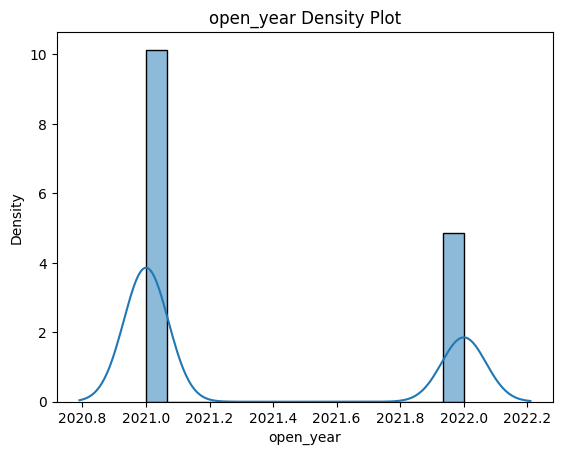

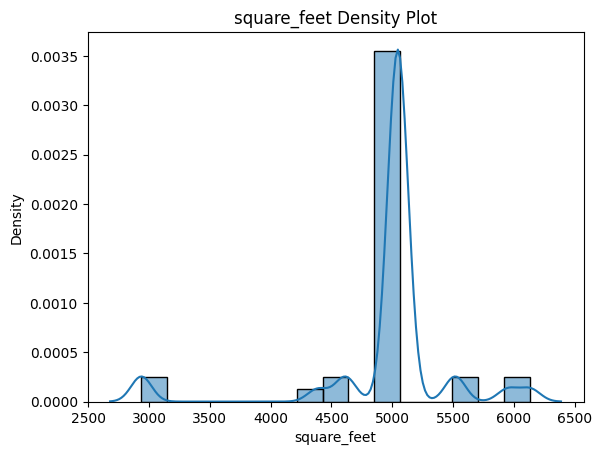

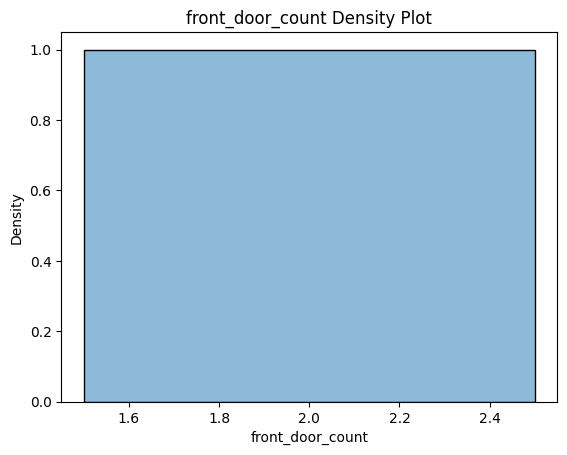

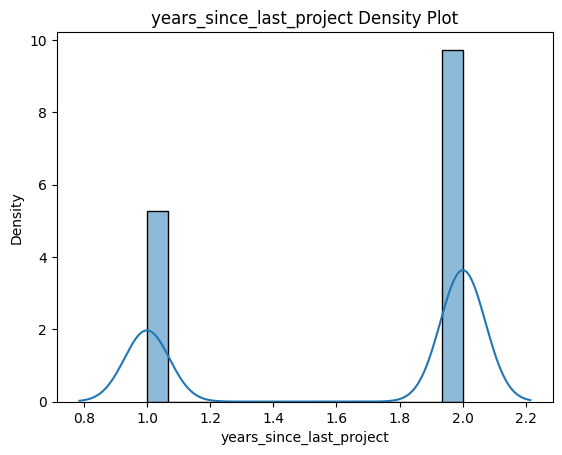

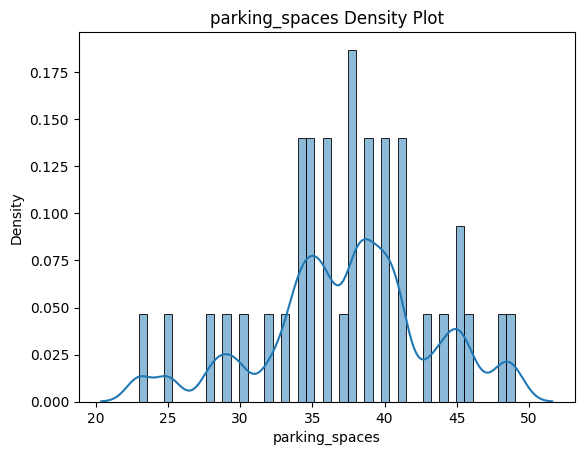

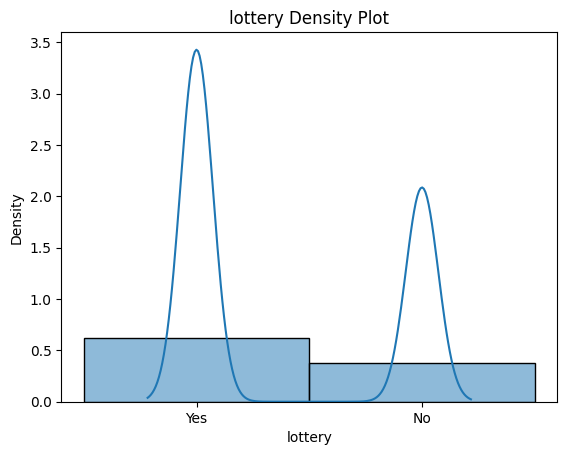

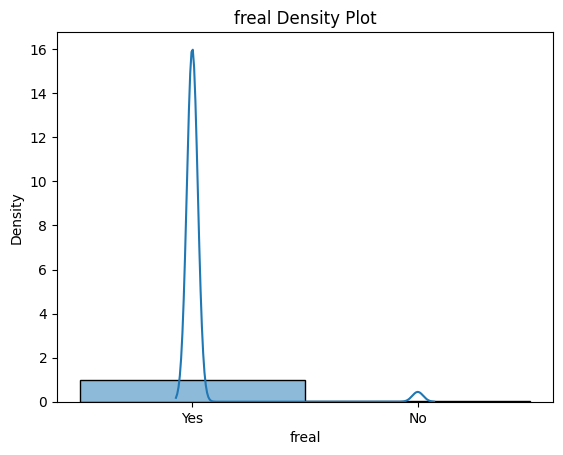

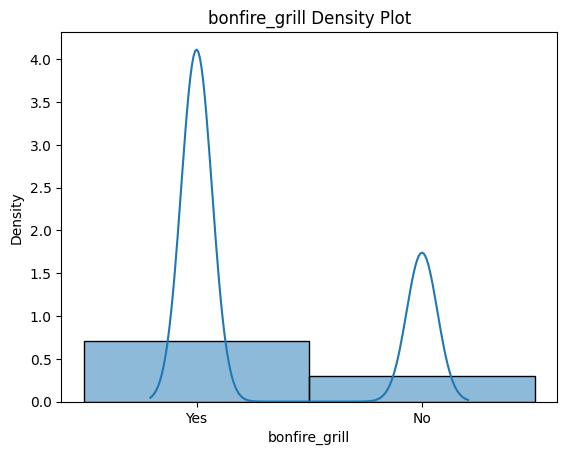

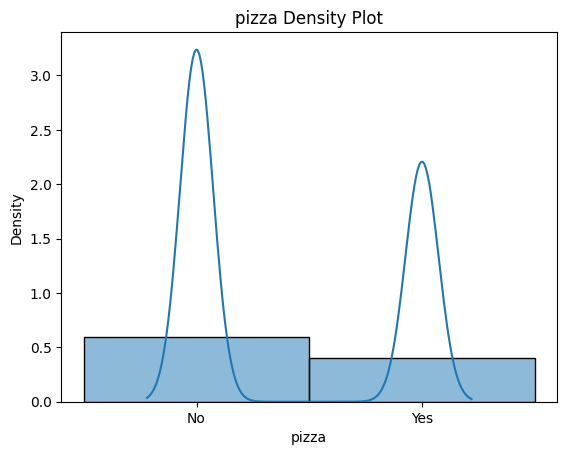

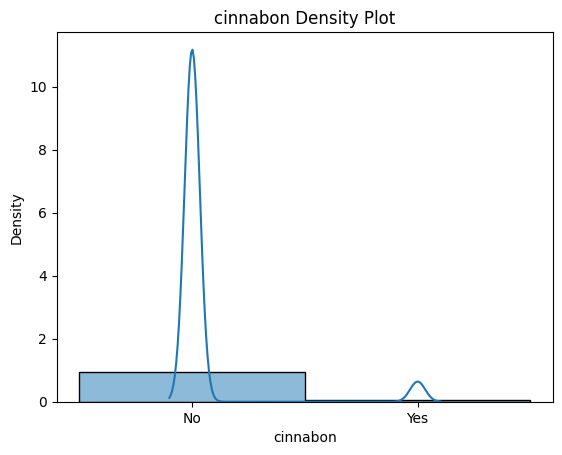

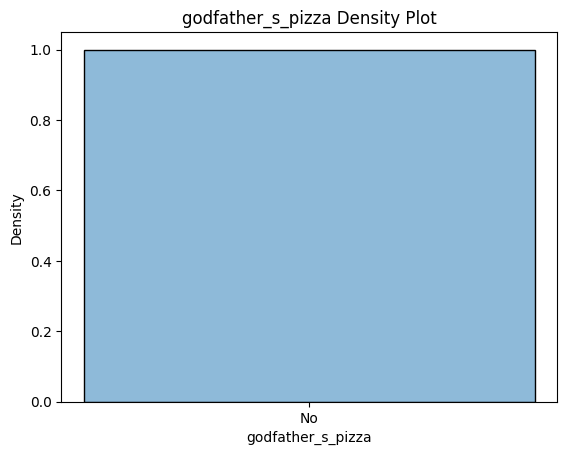

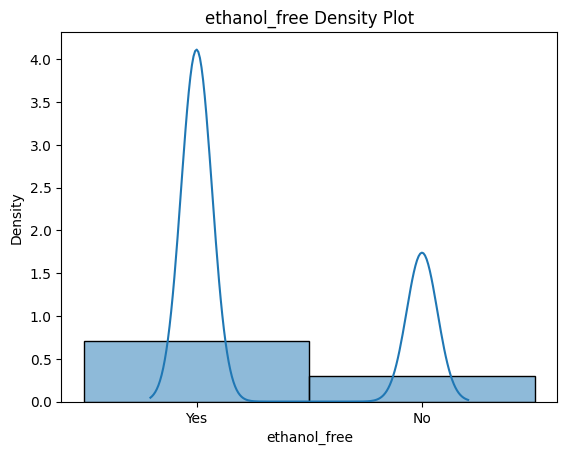

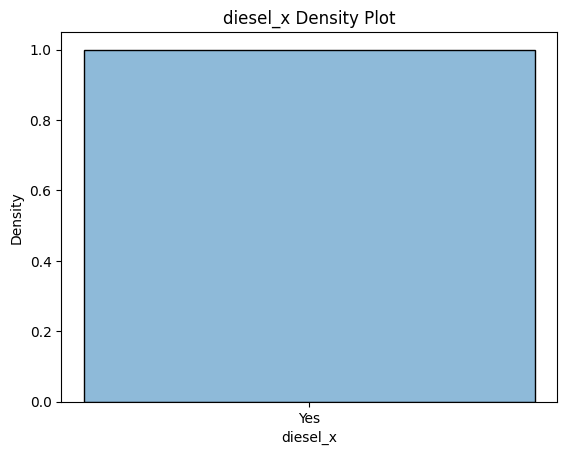

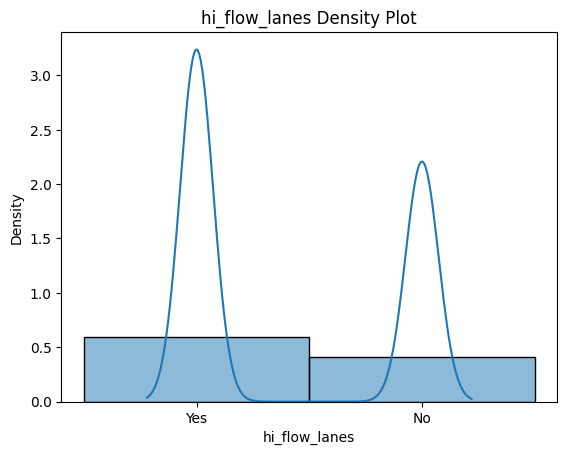

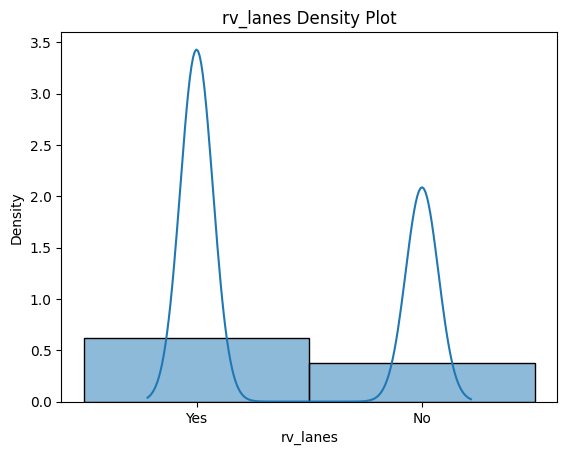

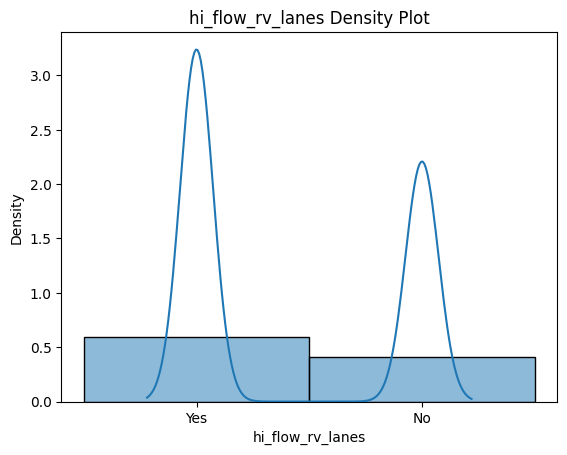

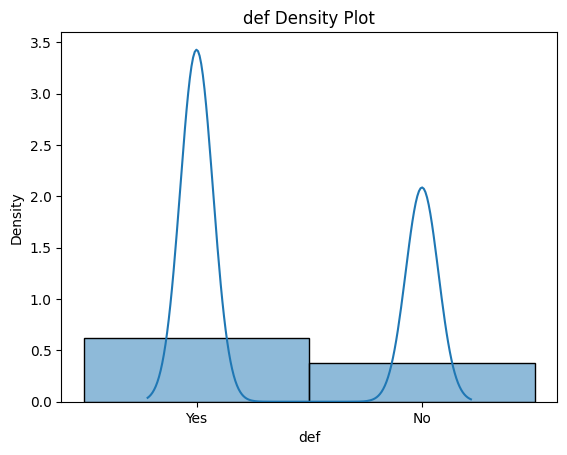

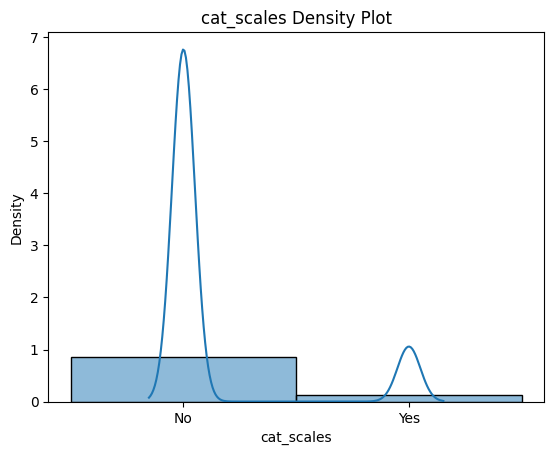

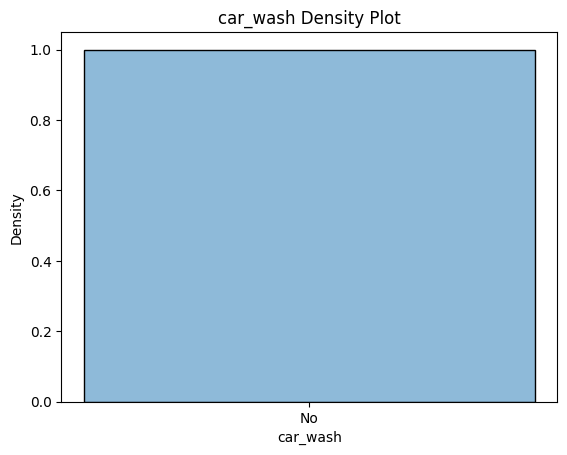

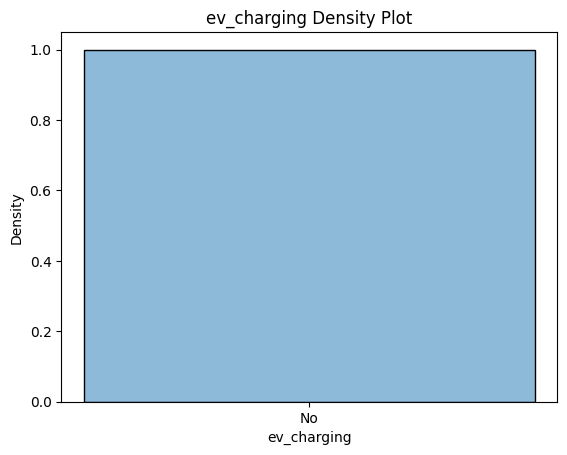

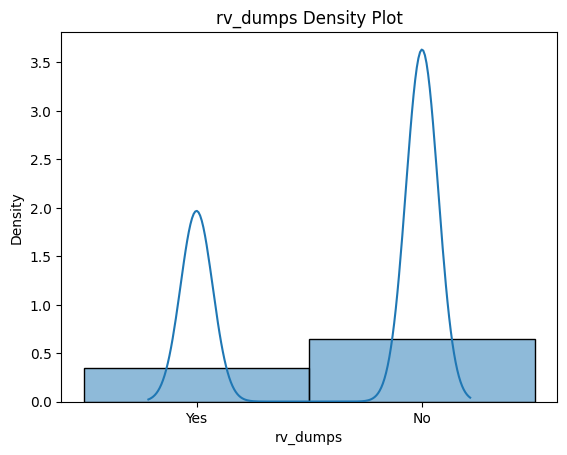

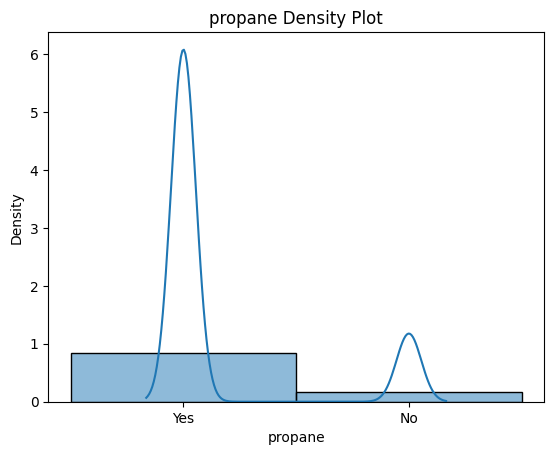

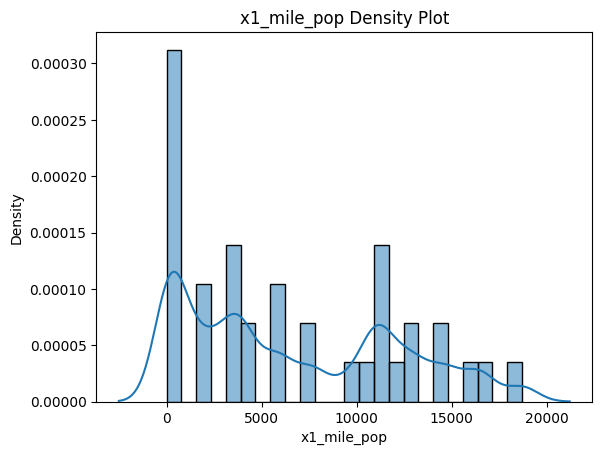

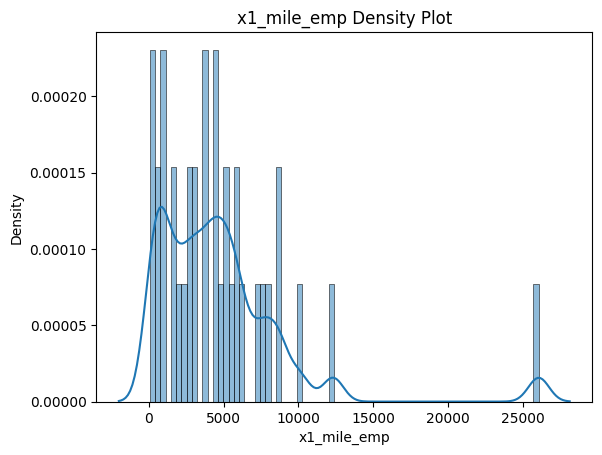

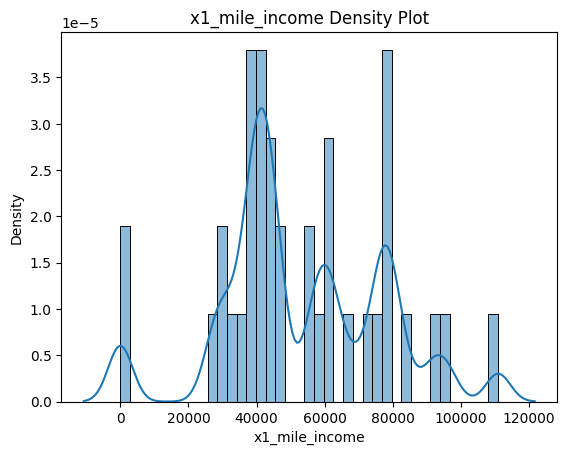

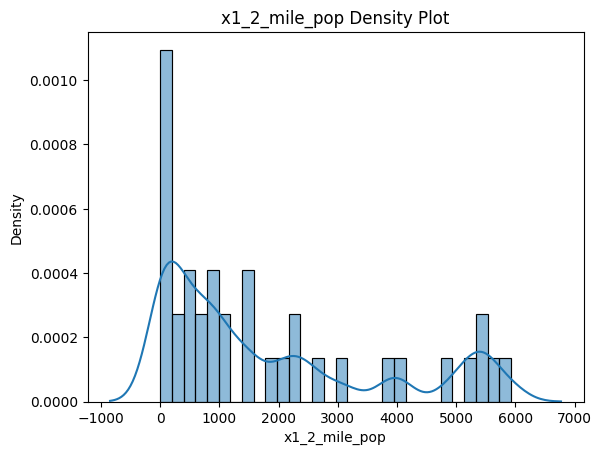

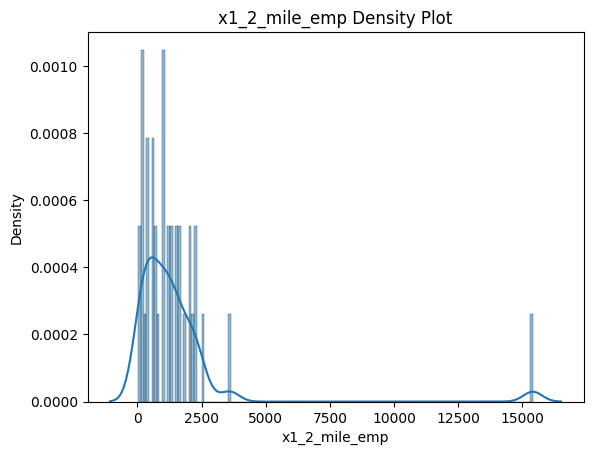

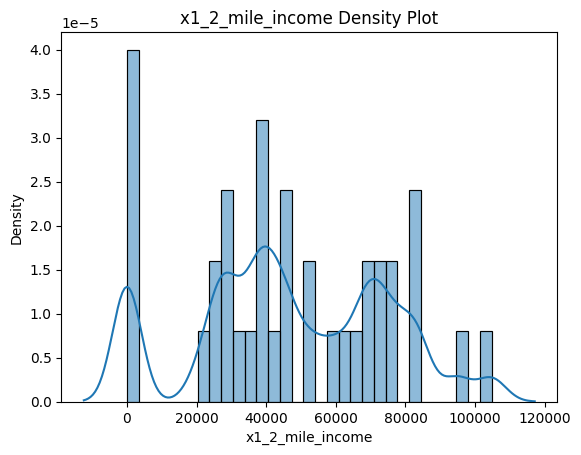

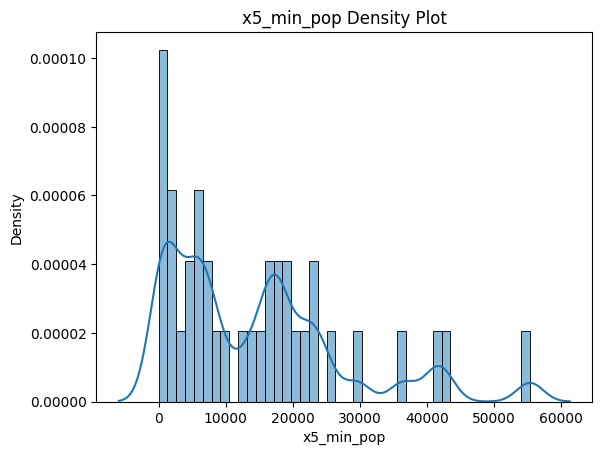

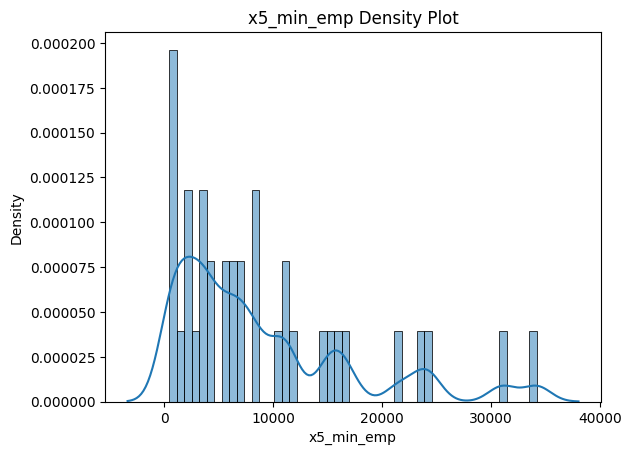

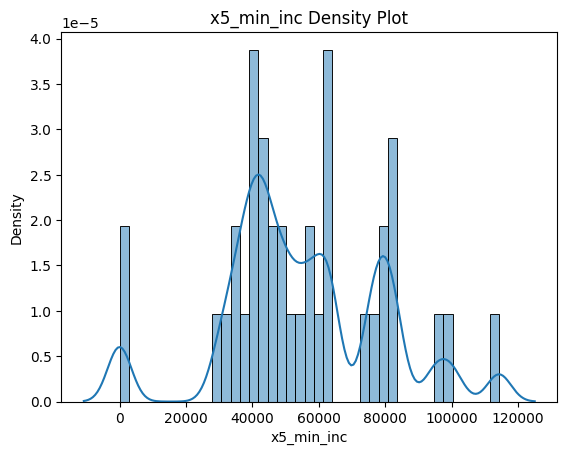

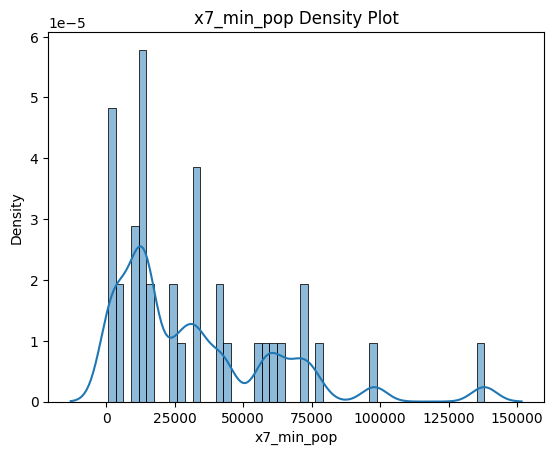

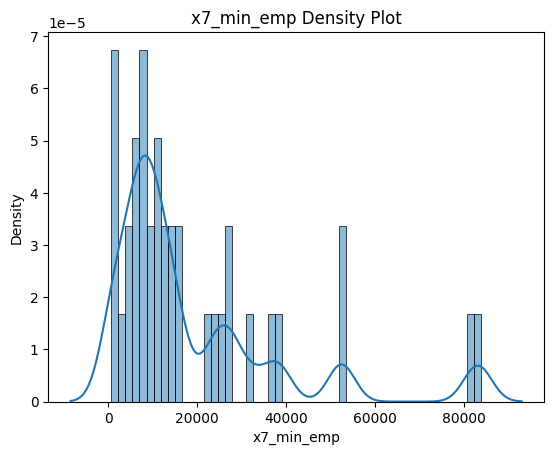

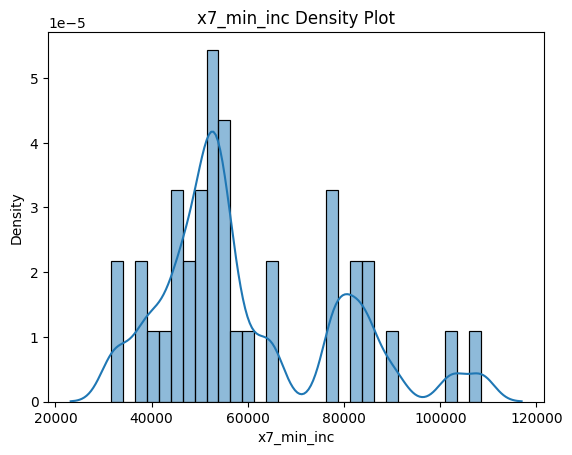

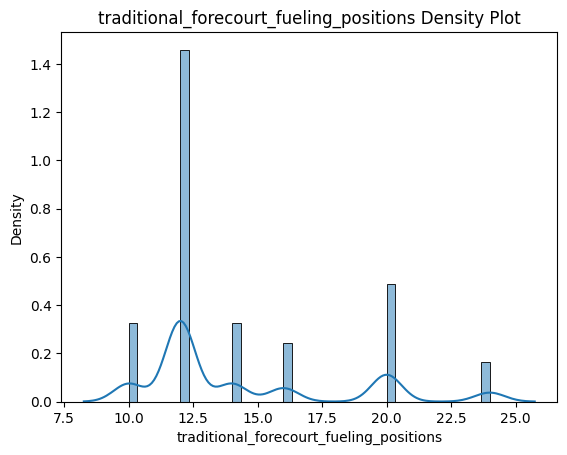

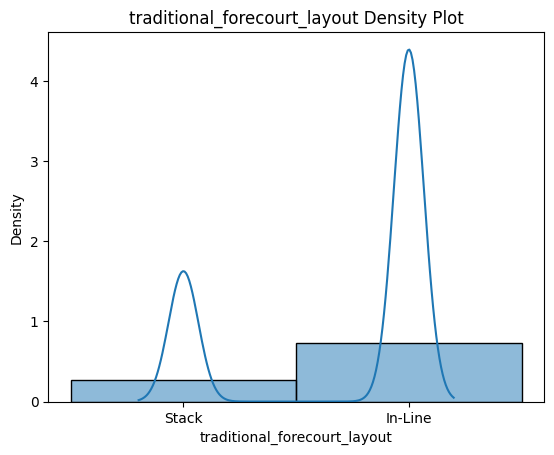

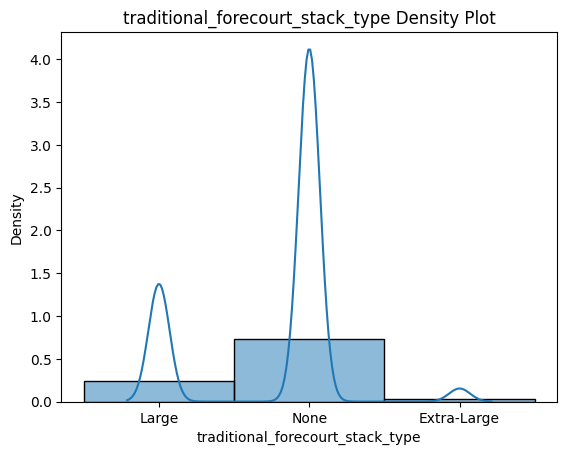

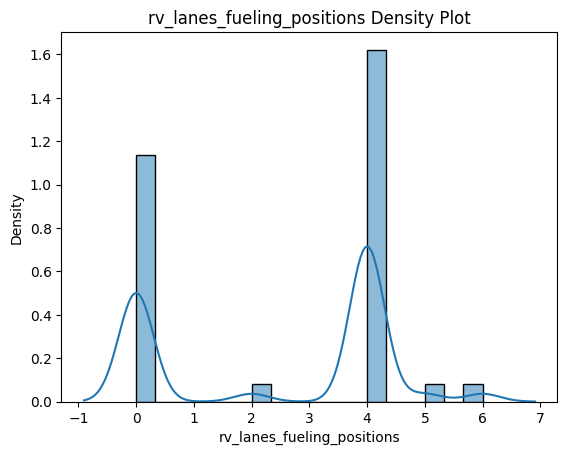

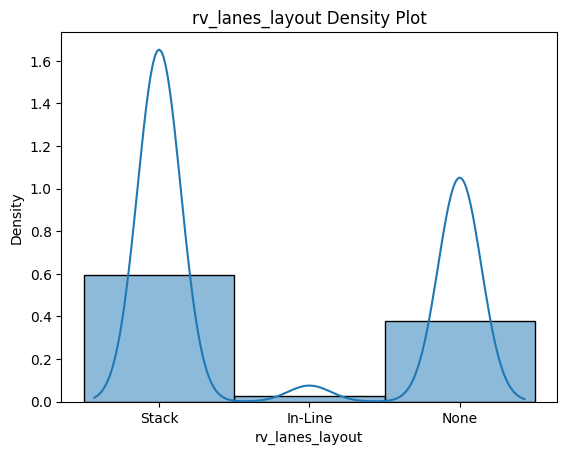

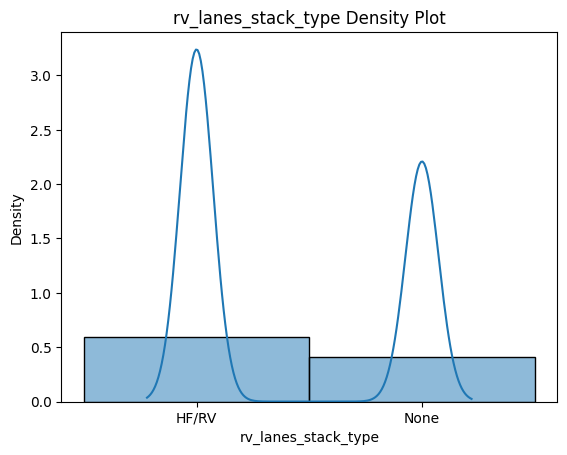

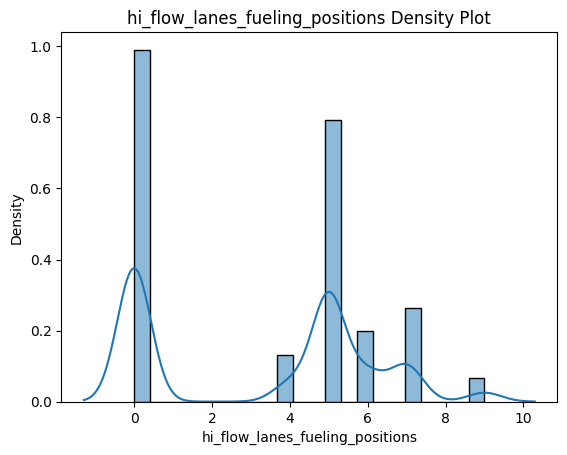

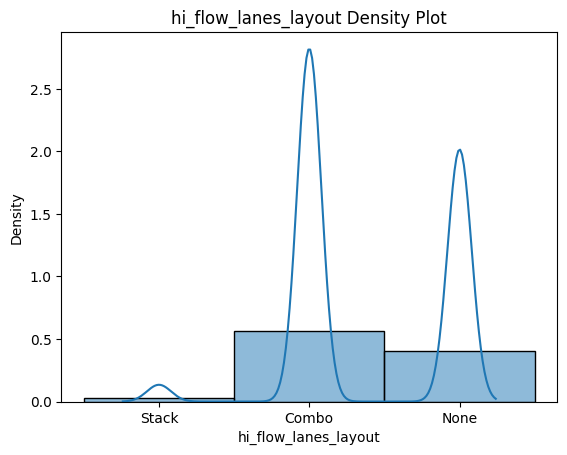

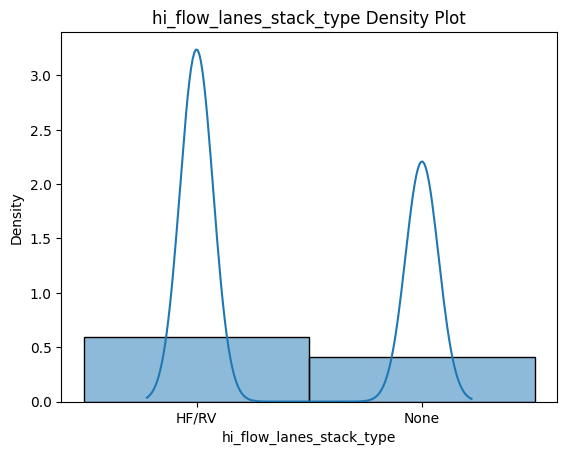

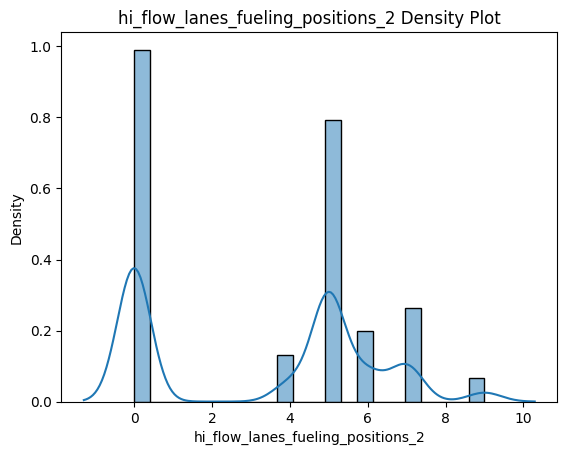

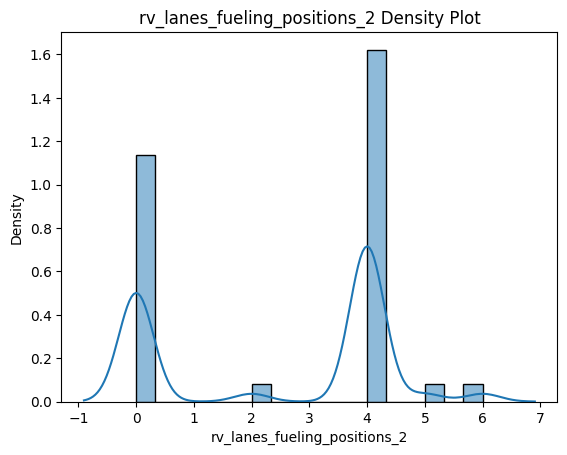

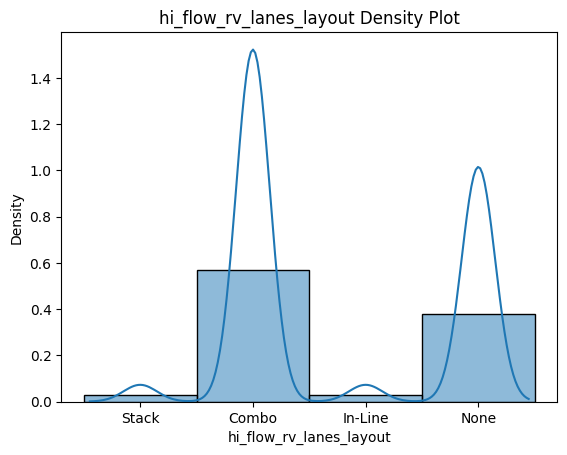

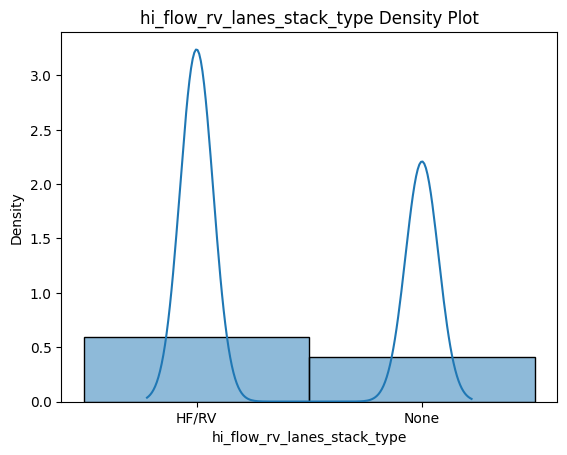

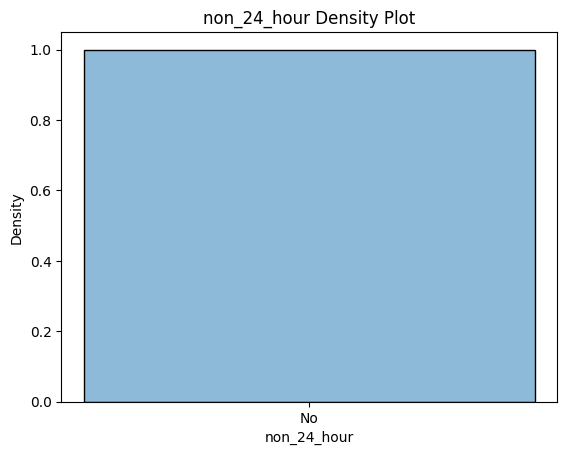

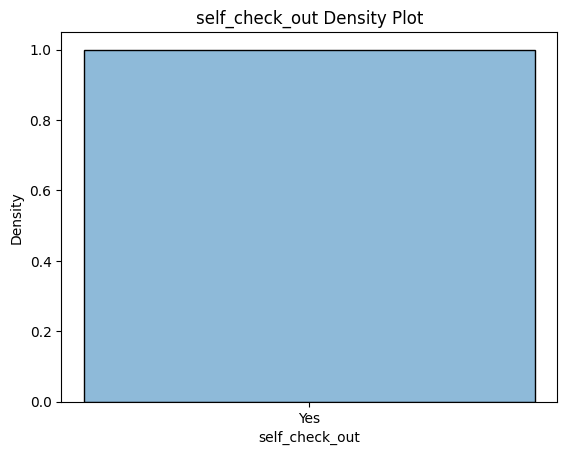

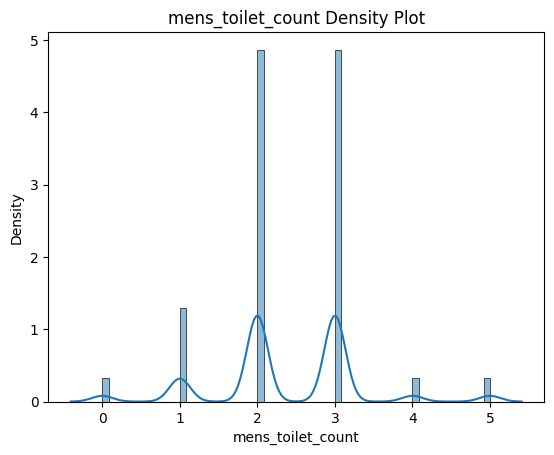

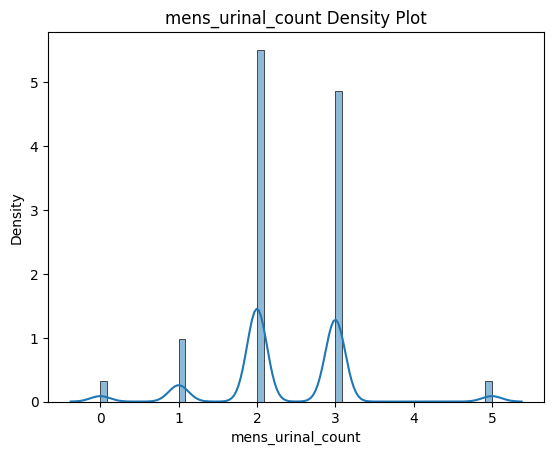

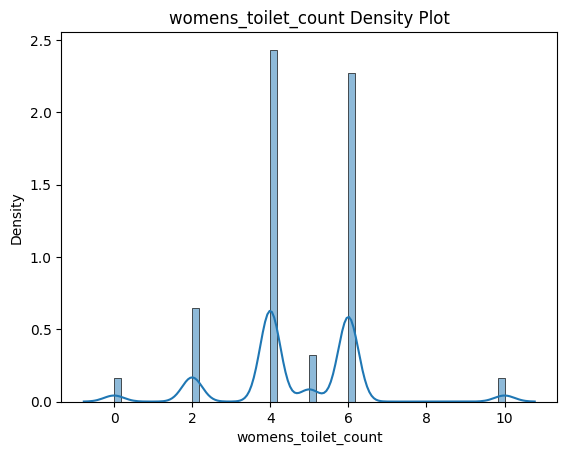

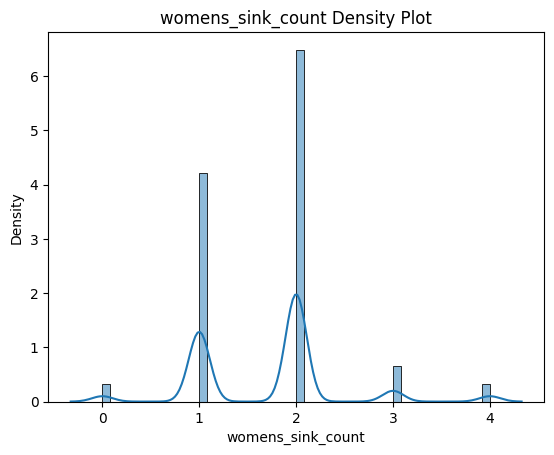

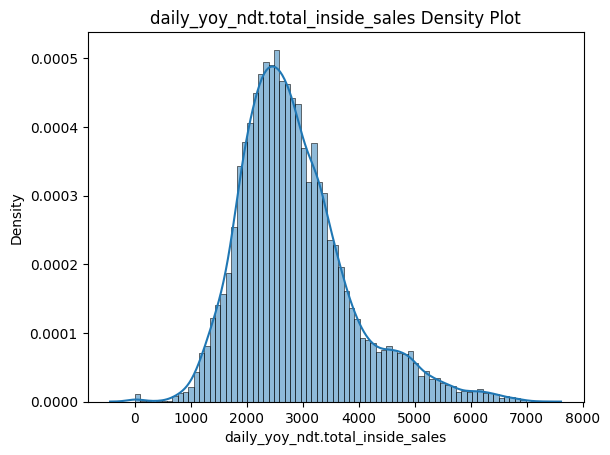

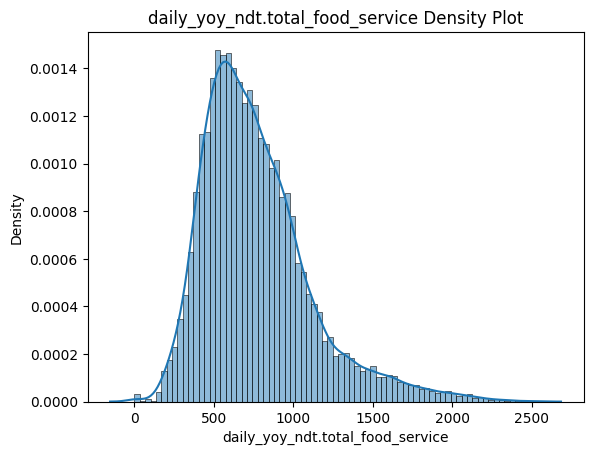

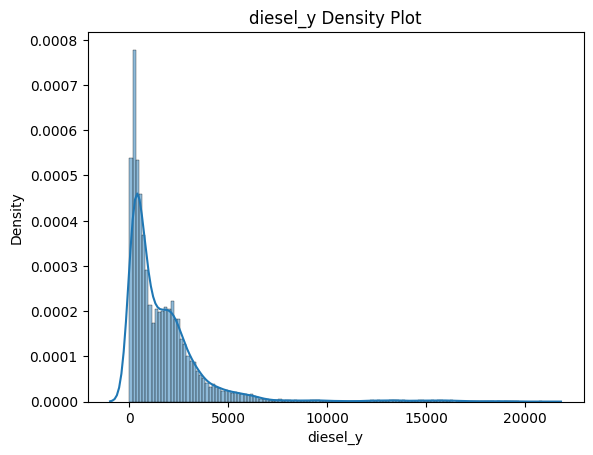

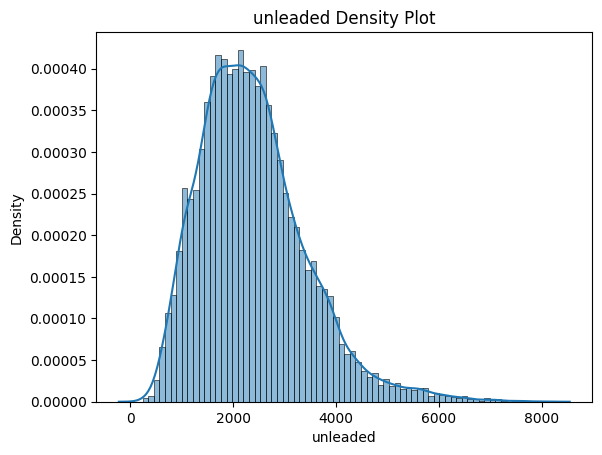

In [ ]:
import matplotlib.pyplot as plt

for i, col in enumerate(data.drop(col_ignore, axis = 1).columns):
  plt.figure(i)
  sns.histplot(data[col], stat = 'density', kde= True, kde_kws={"cut": 3}).set(title = f'{col} Density Plot')

From the above numeric outputs and plots we can see that there are multiple variables that only contain one response. This means they add no additional values to our analysis. It will be best to remove these variables. ('self_check_out', 'non_24_hour', 'ev_charging', 'car_wash', 'diesel_x', 'godfather_s_pizza', 'front_door_count')

In [ ]:
data = data.drop(['self_check_out', 'non_24_hour', 'ev_charging', 'car_wash', 'diesel_x', 'godfather_s_pizza', 'front_door_count'], axis = 1)

## Marco Features:
We wanted to see if we could find additional data to use for our model development. We pulled data from the stock market for crude oil prices, regular & diesel fuel prices, and average monthly state temperature data for all the state Maverik currently has a loction. We wanted to answer a couple of questions including:

* How do oil/gas prices correlate to number of gallons sold?
* How much does fuel price impact quantity *sold*
* How does average temp. correlate to food sales?

In [ ]:
oil.head()

,Date,"Crude Oil Cushing, OK WTI Spot Price FOB (Dollars per Barrel)",New York Harbor Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon),U.S. Gulf Coast Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon),Los Angeles Reformulated RBOB Regular Gasoline Spot Price (Dollars per Gallon),New York Harbor Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon),U.S. Gulf Coast Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon),"Los Angeles, CA Ultra-Low Sulfur CARB Diesel Spot Price (Dollars per Gallon)"
0,1/4/2021,47.47,1.402,1.337,1.534,1.459,1.397,1.484
1,1/5/2021,49.78,1.485,1.423,1.608,1.521,1.471,1.546
2,1/6/2021,50.45,1.503,1.436,1.621,1.524,1.461,1.526
3,1/7/2021,50.63,1.512,1.455,1.625,1.537,1.491,1.525
4,1/8/2021,52.14,1.576,1.519,1.659,1.582,1.535,1.569


In [ ]:
temp_data.head()

,Date,Utah,Idaho,Oregon,South Dakota,Nebraska,New Mexico,Washington,Arizona,Colorado,Nevada,Wyoming,W. Monthly Average Temp
0,1/12/2021,28.1,26.6,34.8,26.5,29.3,35.1,34.6,42.6,26.7,33.7,23.4,29.1
1,2/1/2021,32.2,25.4,33.6,12.8,16.5,37.3,31.4,46.5,24.8,35.6,17.4,30.1
2,3/1/2021,38.4,34.8,39.0,39.4,42.6,44.8,39.7,49.4,35.8,39.2,32.2,38.0
3,4/1/2021,47.4,42.0,46.6,43.6,47.0,53.2,46.8,61.2,43.1,49.3,38.0,46.4
4,5/1/2021,57.1,49.8,52.0,55.0,57.9,62.7,52.6,67.9,52.9,57.2,48.8,55.4


### Date Transformation:
How to identify a yearly week and yearly week day from a date value?
How to identify a US Holiday from a date value?

In [ ]:
from datetime import date
import holidays

def get_hoiday(date):
  US_holidays = holidays.US()

How many holidays are being flagged in the data from Maverick?

In [ ]:
print(data['calendar_information.holiday'].unique().size)
data['calendar_information.holiday'].unique()

26


array(['NONE', "Lincoln's Birthday", "Washington's Birthday", 'Easter',
       'Memorial Day', "Father's Day", "Veteran's Day",
       "Saint Valentine's Day", "Mother's Day", 'Independence Day',
       'Christmas Day', "New Year's Eve", 'Martin Luther King Day',
       "President's Day", "Saint Patrick's Day", 'Labor Day',
       'Columbus Day', 'Thanksgiving Day', 'Christmas Eve', 'Palm Sunday',
       'Good Friday', 'Ascension', 'Flag Day', 'Halloween Day',
       "All Saint's Day", "New Year's Day"], dtype=object)

## Holidays

There are 26 holidays being flagged by Maverick. Some of these seem to be Catholic holidays. For example, 'Good Friday' and 'Palm Sunday'. These seem odd to be tracking as they are not federal holidays where people are off work or traveling.

For simplicity, we are instead only going to track federal holidays. We will use the holidays.US package to identify holidays moving forward. To do this we will drop the current holidays data and add a new holidays variable using the previously mentioned package.



In [ ]:
data = data.drop('calendar_information.holiday', axis = 1)

In [ ]:
data['Holidays'] = pd.Series(data['calendar.calendar_day_date']).apply(lambda x: holidays.US().get(x)).values
data.Holidays.unique() # We are only including US Federal Holidays.

array([None, 'Memorial Day', 'Juneteenth National Independence Day',
       'Veterans Day', 'Juneteenth National Independence Day (Observed)',
       'Independence Day', 'Christmas Day', "New Year's Day (Observed)",
       'Martin Luther King Jr. Day', "Washington's Birthday",
       'Independence Day (Observed)', 'Labor Day', 'Columbus Day',
       'Thanksgiving', 'Christmas Day (Observed)', "New Year's Day"],
      dtype=object)

In [ ]:
percentage_na_values_table(data).head(10)

DF has 57 columns.
There are 1 columns that have missing values.


,Total NA's in Column,Percentage NA
Holidays,13017,96.1


In [ ]:
data.fillna('Not Holiday', inplace = True)

In [ ]:
percentage_na_values_table(data).head(10)

DF has 57 columns.
There are 0 columns that have missing values.


,Total NA's in Column,Percentage NA


### User defined Date functions

These next few user-defined functions will be used both in the cleaning process and building out our predictions.

In [ ]:
def get_holidays(date_value):
  return date_value in holidays.US()

In [ ]:
def get_day_of_week(date_value):
  d = datetime.strptime(date_value, '%m/%d/%Y').weekday()
  return calendar.day_name[d]

In [ ]:
def get_type_of_day(date_value):
  d = datetime.strptime(date_value, '%m/%d/%Y').weekday()
  if d < 5:
    return 'WEEKDAY'
  else:
    return 'WEEKEND'

In [ ]:
def get_week_num(date_value):
  d = datetime.strptime(date_value, '%m/%d/%Y').strftime('%V')
  return d

## Merge Macro & Maverik Data


### Merge Oil
We can now work on joining the oil and temp data to Maverick's data.

In [ ]:
data = pd.merge(data, oil, left_on = 'calendar.calendar_day_date', right_on = 'Date', how = 'left', )
data = data.drop('Date', axis = 1)

In [ ]:
percentage_na_values_table(data).head(10)

DF has 64 columns.
There are 7 columns that have missing values.


,Total NA's in Column,Percentage NA
New York Harbor Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon),4237,31.3
U.S. Gulf Coast Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon),4237,31.3
Los Angeles Reformulated RBOB Regular Gasoline Spot Price (Dollars per Gallon),4237,31.3
New York Harbor Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon),4237,31.3
U.S. Gulf Coast Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon),4237,31.3
"Los Angeles, CA Ultra-Low Sulfur CARB Diesel Spot Price (Dollars per Gallon)",4237,31.3
"Crude Oil Cushing, OK WTI Spot Price FOB (Dollars per Barrel)",3924,29.0


### Oil Data Missing Values & Imputation
When we join the Oil data to the Maverik data, we get missing values for days when the stock market is closed. In this case, weekends and any US Holiday. We will use the "last observation carried forward" to impute missing data; if needed we will then apply "next observation carried back" to fill in any other missing data points. This means that the prices for Friday will carry over to Saturday and Sunday.

In [ ]:
hol = data['Holidays']
data = data.drop('Holidays', axis = 1)
data = data.fillna(method = 'ffill')
data = data.fillna(method = 'bfill')
data['Holidays'] = hol

In [ ]:
percentage_na_values_table(data).head(10)

DF has 64 columns.
There are 0 columns that have missing values.


,Total NA's in Column,Percentage NA


### Merge State Weather Data

In [ ]:
data = pd.merge(data, temp_data, left_on = 'calendar.calendar_day_date', right_on = 'Date', how = 'left')
data = data.drop('Date', axis = 1)
data.head()

,open_year,square_feet,years_since_last_project,parking_spaces,lottery,freal,bonfire_grill,pizza,cinnabon,ethanol_free,...,Oregon,South Dakota,Nebraska,New Mexico,Washington,Arizona,Colorado,Nevada,Wyoming,W. Monthly Average Temp
0,2021,5046,2,38,Yes,Yes,Yes,No,No,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021,5046,2,38,Yes,Yes,Yes,No,No,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,5046,2,38,Yes,Yes,Yes,No,No,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,5046,2,38,Yes,Yes,Yes,No,No,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021,5046,2,38,Yes,Yes,Yes,No,No,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Weather Data Missing Values & Imputation

Following the same method we used on the missing oil data, we will use "last observation carried forward" and if needed "next observation carried back" to impute missing data.

In [ ]:
data = data.drop('Holidays', axis = 1)
data = data.fillna(method = 'ffill')
data = data.fillna(method = 'bfill')
data['Holidays'] = hol

In [ ]:
percentage_na_values_table(data).head(10)

DF has 76 columns.
There are 0 columns that have missing values.


,Total NA's in Column,Percentage NA


In [ ]:
data.head()

,open_year,square_feet,years_since_last_project,parking_spaces,lottery,freal,bonfire_grill,pizza,cinnabon,ethanol_free,...,South Dakota,Nebraska,New Mexico,Washington,Arizona,Colorado,Nevada,Wyoming,W. Monthly Average Temp,Holidays
0,2021,5046,2,38,Yes,Yes,Yes,No,No,Yes,...,39.4,42.6,44.8,39.7,49.4,35.8,39.2,32.2,38.0,Not Holiday
1,2021,5046,2,38,Yes,Yes,Yes,No,No,Yes,...,39.4,42.6,44.8,39.7,49.4,35.8,39.2,32.2,38.0,Not Holiday
2,2021,5046,2,38,Yes,Yes,Yes,No,No,Yes,...,39.4,42.6,44.8,39.7,49.4,35.8,39.2,32.2,38.0,Not Holiday
3,2021,5046,2,38,Yes,Yes,Yes,No,No,Yes,...,39.4,42.6,44.8,39.7,49.4,35.8,39.2,32.2,38.0,Not Holiday
4,2021,5046,2,38,Yes,Yes,Yes,No,No,Yes,...,39.4,42.6,44.8,39.7,49.4,35.8,39.2,32.2,38.0,Not Holiday


## Correlation Heat Map

We wanted to see the correlation between variables to see if there are any particular varaibles that correlate with each other. From looking through the plot, we did not find correlation to be out of the ordinary.

In [ ]:
data.corr().style.background_gradient(cmap ='coolwarm')

<ipython-input-43-f8d96ce84459>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr().style.background_gradient(cmap ='coolwarm')


,open_year,square_feet,years_since_last_project,parking_spaces,x1_mile_pop,x1_mile_emp,x1_mile_income,x1_2_mile_pop,x1_2_mile_emp,x1_2_mile_income,x5_min_pop,x5_min_emp,x5_min_inc,x7_min_pop,x7_min_emp,x7_min_inc,traditional_forecourt_fueling_positions,rv_lanes_fueling_positions,hi_flow_lanes_fueling_positions,hi_flow_lanes_fueling_positions_2,rv_lanes_fueling_positions_2,mens_toilet_count,mens_urinal_count,womens_toilet_count,womens_sink_count,site_id_msba,calendar.fiscal_week_id_for_year,daily_yoy_ndt.total_inside_sales,daily_yoy_ndt.total_food_service,diesel_y,unleaded,"Crude Oil Cushing, OK WTI Spot Price FOB (Dollars per Barrel)",New York Harbor Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon),U.S. Gulf Coast Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon),Los Angeles Reformulated RBOB Regular Gasoline Spot Price (Dollars per Gallon),New York Harbor Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon),U.S. Gulf Coast Ultra-Low Sulfur No 2 Diesel Spot Price (Dollars per Gallon),"Los Angeles, CA Ultra-Low Sulfur CARB Diesel Spot Price (Dollars per Gallon)",Utah,Idaho,Oregon,South Dakota,Nebraska,New Mexico,Washington,Arizona,Colorado,Nevada,Wyoming,W. Monthly Average Temp
open_year,1.000000,-0.192409,-0.941357,-0.028334,-0.230505,-0.235286,0.170861,-0.220853,-0.161754,0.072294,-0.109812,-0.180327,0.146184,-0.094008,-0.141329,0.243834,0.159450,-0.061743,0.002163,0.002163,-0.061743,-0.224399,-0.219693,-0.326963,0.123938,0.671855,-0.000880,-0.069297,0.026521,-0.045712,-0.221243,-0.015587,0.111766,0.055195,0.116480,0.219266,0.215758,0.201209,-0.055653,-0.030094,-0.047792,-0.020774,-0.030016,-0.021913,0.008629,-0.067927,-0.051333,-0.073312,-0.052838,-0.048845
square_feet,-0.192409,1.000000,0.181125,0.512273,0.081303,0.067731,0.124278,0.038785,0.065212,0.013999,0.031238,0.013214,0.118845,0.044482,-0.043739,-0.047139,0.101104,0.160360,0.079428,0.079428,0.160360,0.238842,0.253151,-0.036418,-0.252981,-0.203161,0.000121,-0.196982,-0.108011,0.075498,-0.069720,0.004553,-0.022697,-0.012559,-0.021243,-0.043348,-0.041276,-0.038229,0.035205,0.024390,0.027531,0.018392,0.025206,0.034425,0.016107,0.043985,0.033964,0.037200,0.029308,0.032454
years_since_last_project,-0.941357,0.181125,1.000000,0.022017,0.261263,0.257998,-0.109185,0.247346,0.162166,-0.029414,0.100381,0.164958,-0.096915,0.106509,0.151441,-0.181812,-0.239638,0.018920,-0.034996,-0.034996,0.018920,0.181408,0.171980,0.276330,-0.144581,-0.608462,0.000534,0.088361,-0.018858,0.050270,0.201761,-0.005757,-0.133397,-0.078795,-0.141029,-0.236430,-0.236312,-0.224180,0.056122,0.032672,0.045896,0.024845,0.033402,0.025374,-0.007749,0.066775,0.053654,0.071321,0.055134,0.049899
parking_spaces,-0.028334,0.512273,0.022017,1.000000,0.018800,0.149524,0.163143,0.043946,0.240364,0.004789,-0.016454,-0.038980,0.132765,-0.053546,-0.057206,0.026533,-0.038102,0.133496,0.078831,0.078831,0.133496,0.281180,0.338129,0.008764,0.167756,0.059525,0.000298,-0.227230,-0.152398,0.144365,-0.073563,-0.057014,-0.074864,-0.072173,-0.073249,-0.091553,-0.092602,-0.094888,0.039701,0.045855,0.052789,0.042652,0.036869,0.036282,0.051183,0.039142,0.037052,0.043851,0.042974,0.041602
x1_mile_pop,-0.230505,0.081303,0.261263,0.018800,1.000000,0.535985,0.249023,0.914542,0.339833,0.275087,0.821745,0.448041,0.398488,0.714997,0.320397,0.324207,-0.180283,-0.622701,-0.627867,-0.627867,-0.622701,-0.325018,-0.291902,-0.251707,-0.584866,-0.106862,-0.000018,-0.146207,-0.364787,-0.412535,-0.128380,0.058864,0.036827,0.056064,0.016890,-0.008804,-0.005068,0.000400,0.007527,-0.000648,0.005157,-0.003295,-0.000368,-0.002960,-0.014709,0.010503,0.007582,0.016895,0.007053,0.005740
x1_mile_emp,-0.235286,0.067731,0.257998,0.149524,0.535985,1.000000,-0.246582,0.469044,0.887929,-0.179146,0.380305,0.748979,-0.155504,0.378551,0.636270,-0.189042,-0.166185,-0.190178,-0.142028,-0.142028,-0.190178,-0.028772,-0.035912,-0.043336,-0.153413,-0.217948,-0.000348,-0.092304,-0.194294,-0.059426,-0.057403,-0.006478,-0.042594,-0.

## Create Dummy Variables

Now we need to convert categorical varaibles to numeric values for future analysis.

In [ ]:
df_cat = data.select_dtypes(include = 'object')
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13542 entries, 0 to 13541
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   lottery                             13542 non-null  object
 1   freal                               13542 non-null  object
 2   bonfire_grill                       13542 non-null  object
 3   pizza                               13542 non-null  object
 4   cinnabon                            13542 non-null  object
 5   ethanol_free                        13542 non-null  object
 6   hi_flow_lanes                       13542 non-null  object
 7   rv_lanes                            13542 non-null  object
 8   hi_flow_rv_lanes                    13542 non-null  object
 9   def                                 13542 non-null  object
 10  cat_scales                          13542 non-null  object
 11  rv_dumps                            13542 non-null  ob

In [ ]:
col_ignore = ['capital_projects.soft_opening_date', 'calendar.calendar_day_date']

df_ignore = data[col_ignore]
data = data.drop(col_ignore, axis = 1)
data = pd.get_dummies(data, drop_first = True, dtype = float)
data['soft_opening_date'] = df_ignore['capital_projects.soft_opening_date']
data['calendar_day_date'] = df_ignore['calendar.calendar_day_date']
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13542 entries, 0 to 13541
Data columns (total 100 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   open_year                                                                          13542 non-null  int64  
 1   square_feet                                                                        13542 non-null  int64  
 2   years_since_last_project                                                           13542 non-null  int64  
 3   parking_spaces                                                                     13542 non-null  int64  
 4   x1_mile_pop                                                                        13542 non-null  int64  
 5   x1_mile_emp                                                                        13542 non-null  in

In [ ]:
data.head()

,open_year,square_feet,years_since_last_project,parking_spaces,x1_mile_pop,x1_mile_emp,x1_mile_income,x1_2_mile_pop,x1_2_mile_emp,x1_2_mile_income,...,Holidays_Martin Luther King Jr. Day,Holidays_Memorial Day,Holidays_New Year's Day,Holidays_New Year's Day (Observed),Holidays_Not Holiday,Holidays_Thanksgiving,Holidays_Veterans Day,Holidays_Washington's Birthday,soft_opening_date,calendar_day_date
0,2021,5046,2,38,4046,3648,43435,556,642,45678,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1/12/2021,1/17/2021
1,2021,5046,2,38,4046,3648,43435,556,642,45678,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1/12/2021,1/20/2021
2,2021,5046,2,38,4046,3648,43435,556,642,45678,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1/12/2021,1/21/2021
3,2021,5046,2,38,4046,3648,43435,556,642,45678,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1/12/2021,1/24/2021
4,2021,5046,2,38,4046,3648,43435,556,642,45678,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1/12/2021,1/29/2021


## Results

In this notebook, we have explored and cleaned the data provided by Maverik. We determined that the data is fairly clean with no missing variables. Through our analysis of variance and veiwing the individual variable's distributions we determined that there were seven variables we could remove from the data due to no variance in the variable. We then looked at the holiday varaible contained within the data. This varaible was tracking a variety of holidays, many of which were catholic. We chose to drop this column and replace it with a holiday column that tracked US Federal Holidays and the respective days observed. After reviewing the data provided by Maverik, we chose to add two other data sets. These included oil and gas prices, as well as average monthly tempatures for States in which Marerik is operating. After all the data had been combined and transformed, we obtained a final data set for modeling that contained 100 columns with 13,542 observations. This data set is now ready to be used for model training and testing, with the goal to beat Maverik's current model in prediction accuracy.